# Eksploracyjna analiza danych

In [2]:
# Import libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
with open('../data/processed/exploration_data.pkl', 'rb') as f:
    data = pickle.load(f)

C:\Users\janbi\AppData\Local\Temp\ipykernel_28720\4035796773.py:3: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(f)


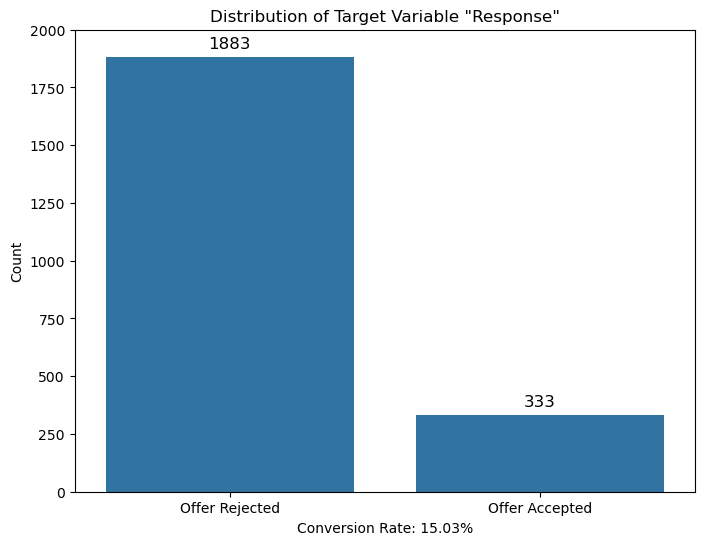

In [4]:
# Get the count of each class in the target variable
response_counts = data['Response'].value_counts()

# Calculate the conversion rate
conversion_rate = (response_counts[1] / response_counts.sum()) * 100

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.barplot(x=response_counts.index, y=response_counts.values, legend=False)
plt.title('Distribution of Target Variable "Response"')
plt.xlabel(f"Conversion Rate: {conversion_rate:.2f}%")
plt.ylabel('Count')
plt.ylim(0, 2000)  # Set the y-axis limit
plt.xticks(ticks=[0, 1], labels=['Offer Rejected', 'Offer Accepted'])

# Add data labels
for i, count in enumerate(response_counts):
    plt.text(i, count + 25, str(count), ha='center', va='bottom', fontsize=12)

plt.show()


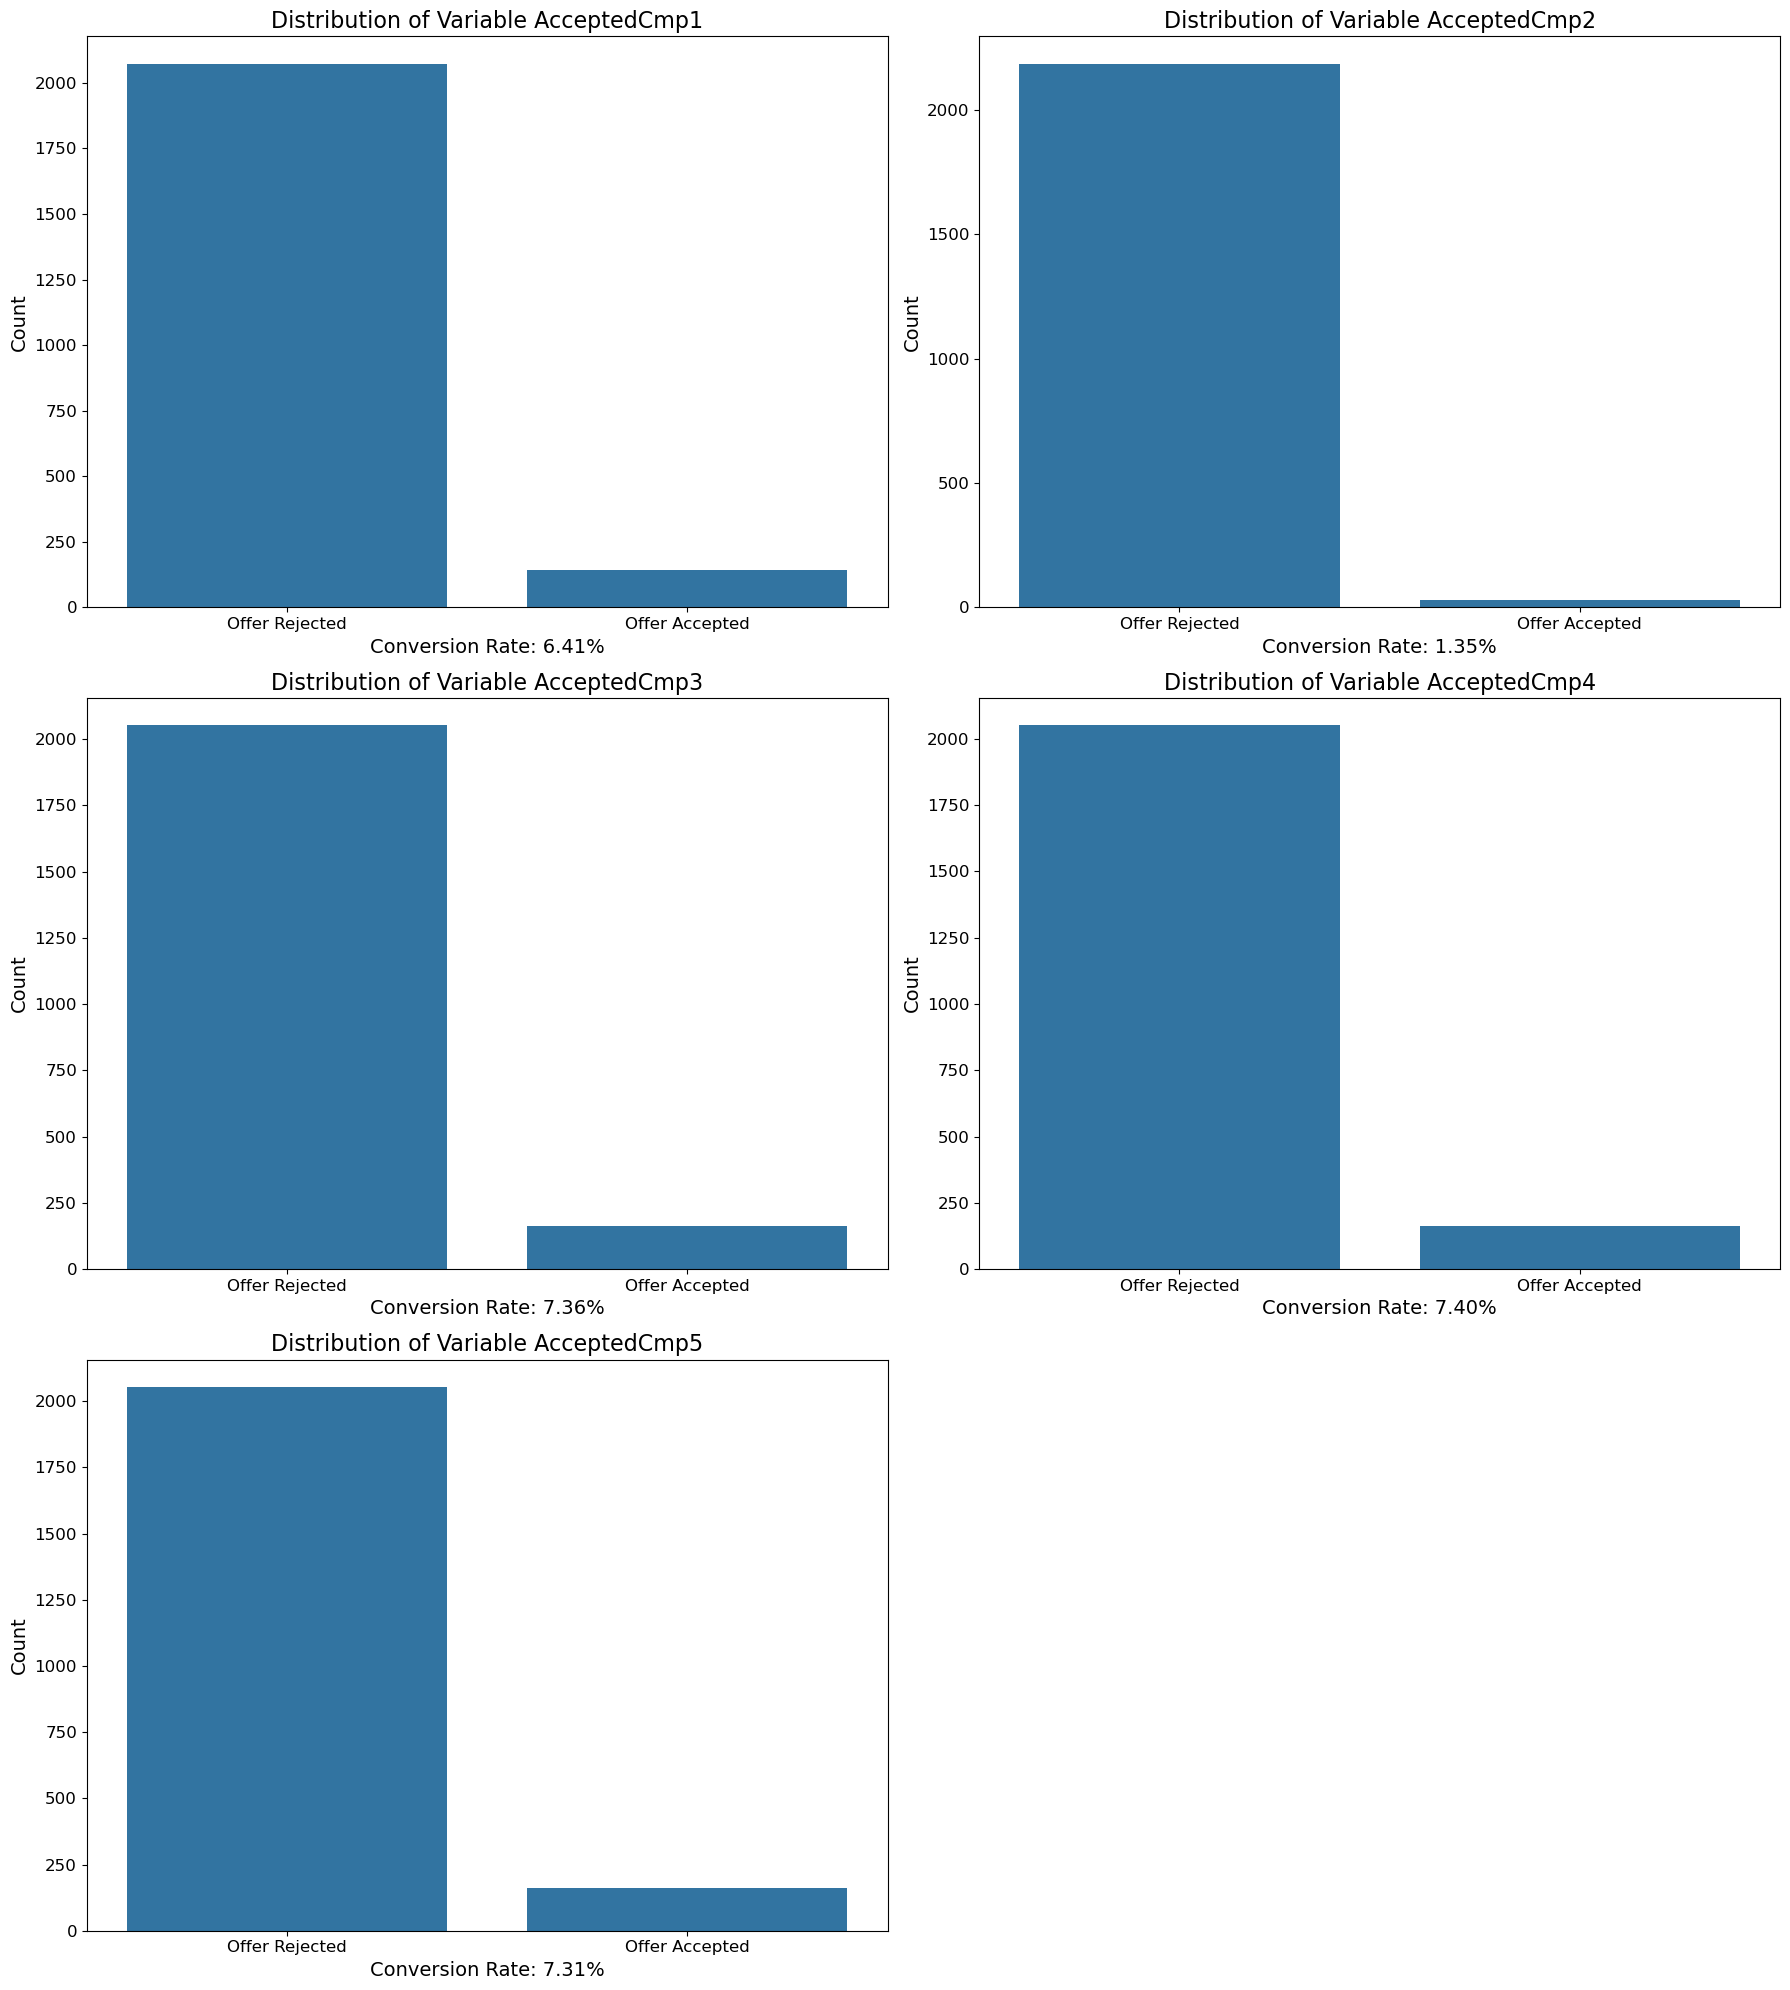

In [5]:
# 3. Count Plots for Categorical Features
plt.figure(figsize=(18, 20))
for i, feature in enumerate(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"], 1):
    # Get the count of each class in the target variable
    response_counts = data[feature].value_counts()
    conversion_rate = (response_counts[1] / response_counts.sum()) * 100
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, data=data,)
    plt.title(f'Distribution of Variable {feature}', fontsize=16)
    plt.xlabel(f"Conversion Rate: {conversion_rate:.2f}%", fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(ticks=[0, 1], labels=['Offer Rejected', 'Offer Accepted'], fontsize=12)
    plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [6]:
# Infer data types
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()

# Remove binary columns from numerical and categorical lists
numerical_features = [col for col in numerical_cols if data[col].nunique() > 5]
categorical_features = categorical_cols + [col for col in numerical_cols if data[col].nunique() <= 5 and col != 'Response']

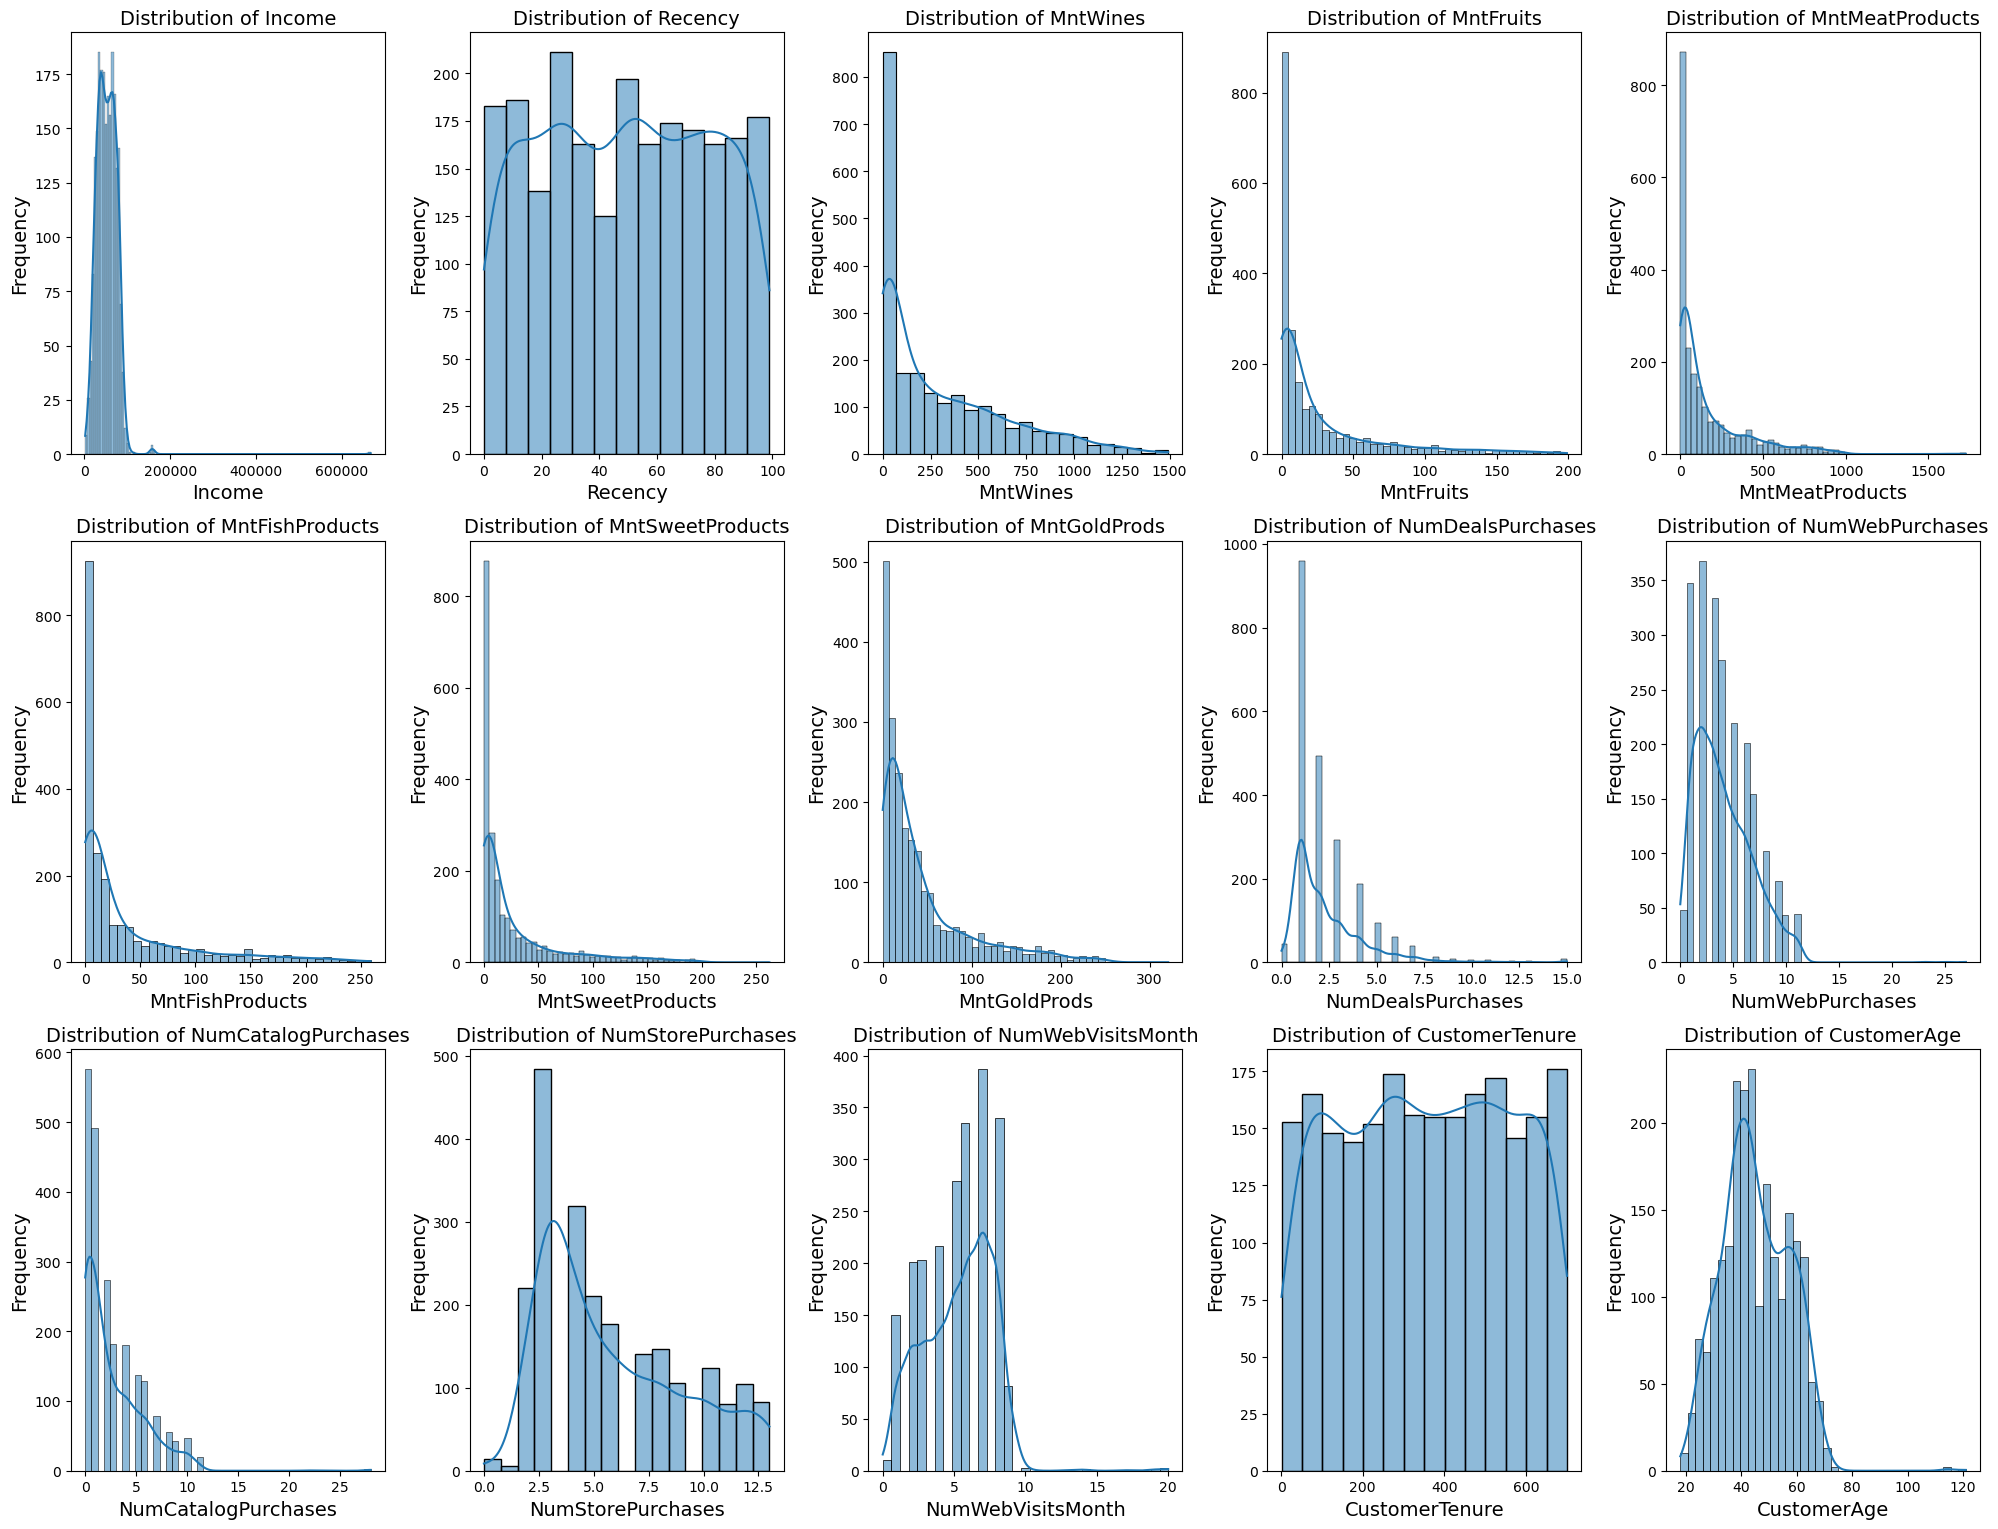

In [7]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

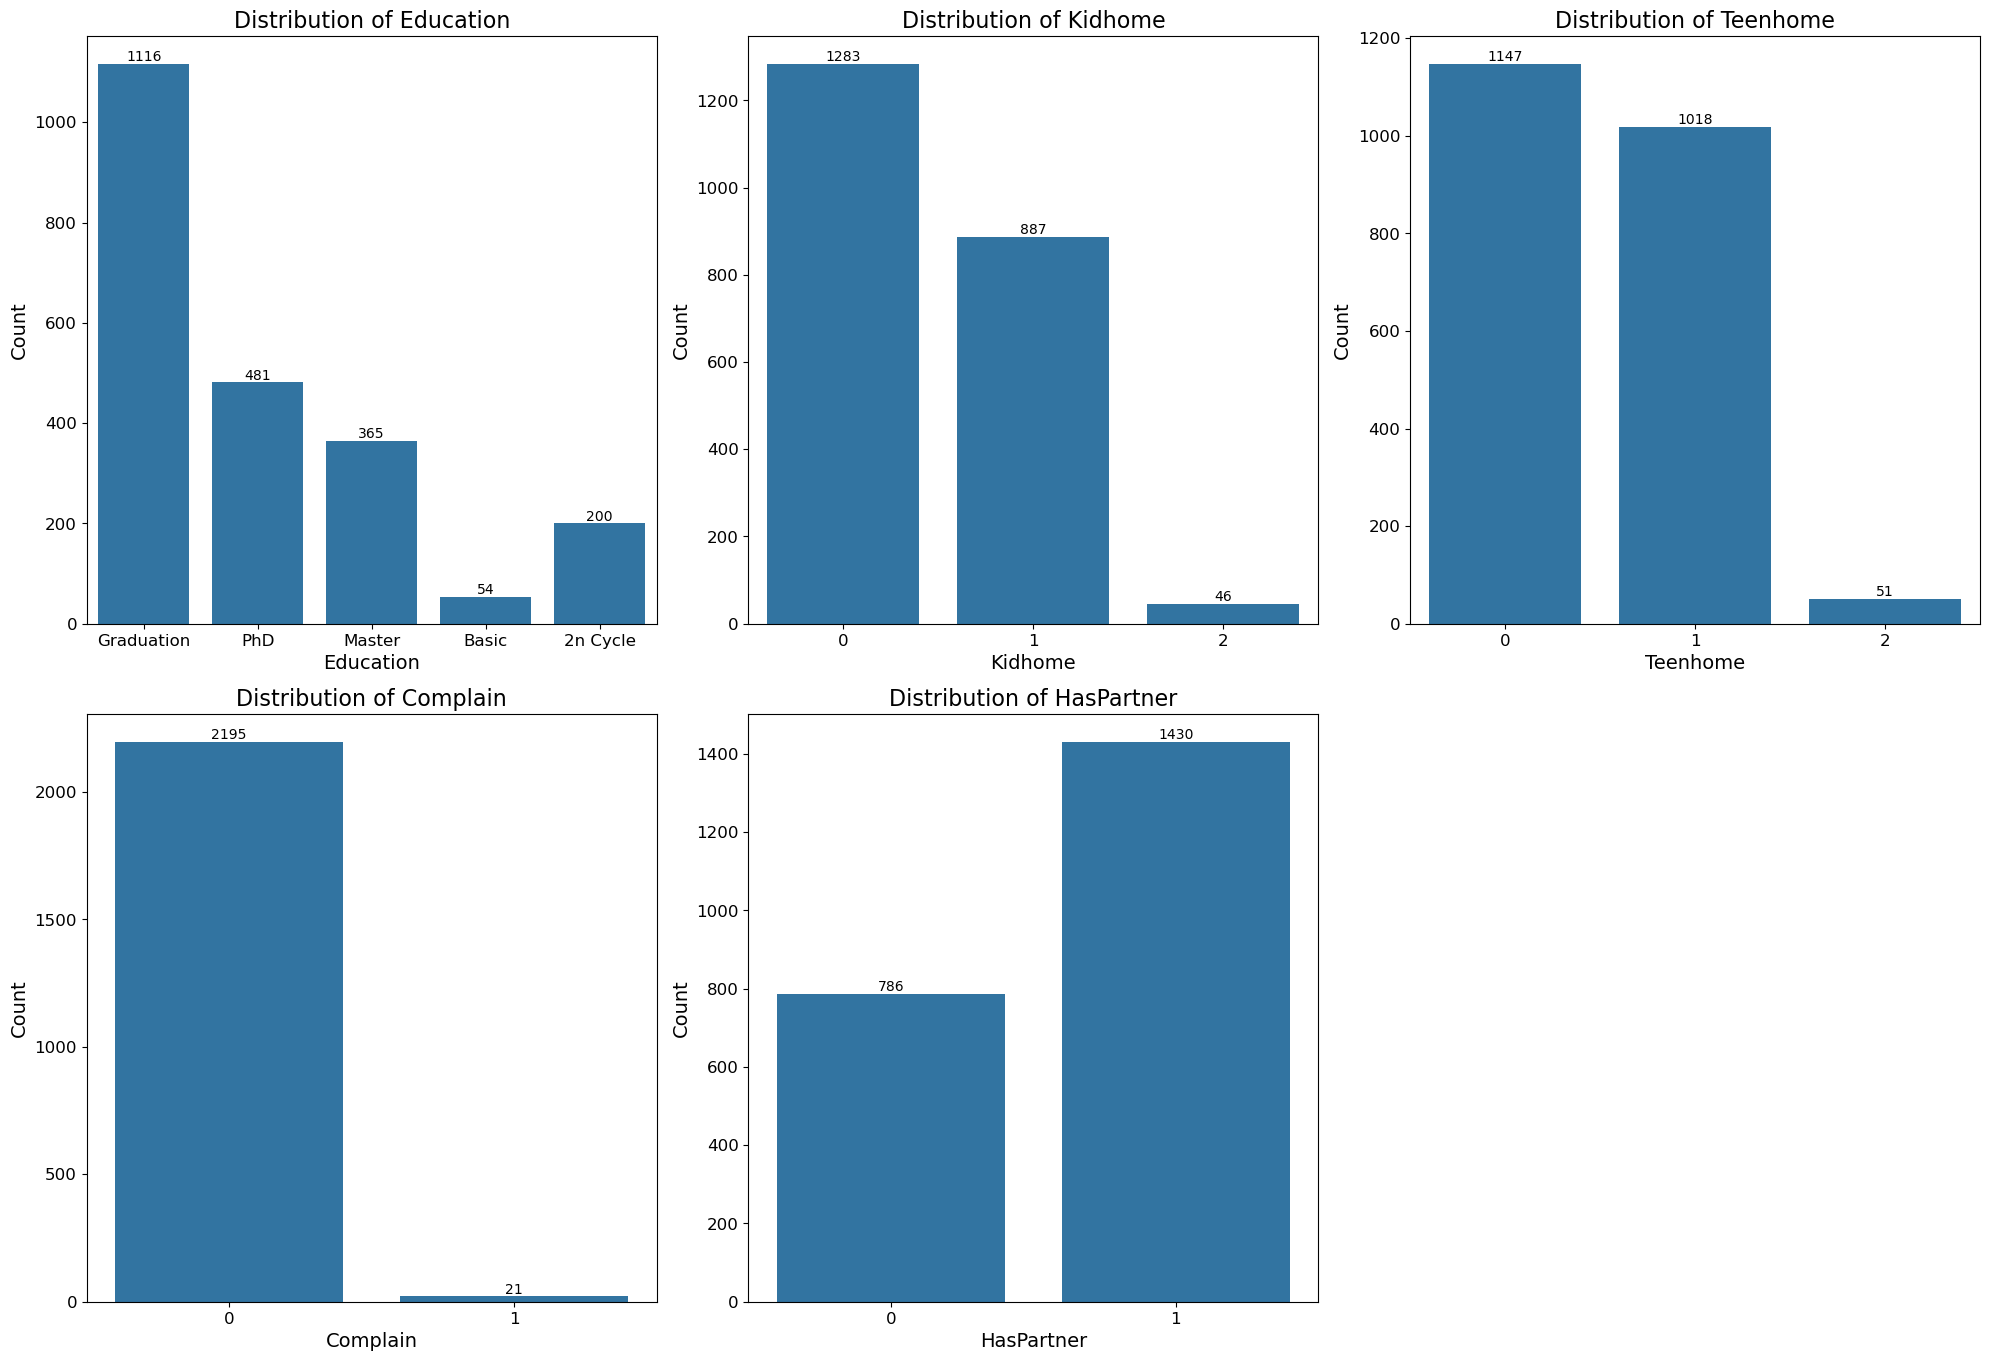

In [8]:
# Remove specified features from the list
filtered_features = [feature for feature in categorical_features if feature not in ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]]

# 3. Count Plots for Categorical Features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(filtered_features, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.show()

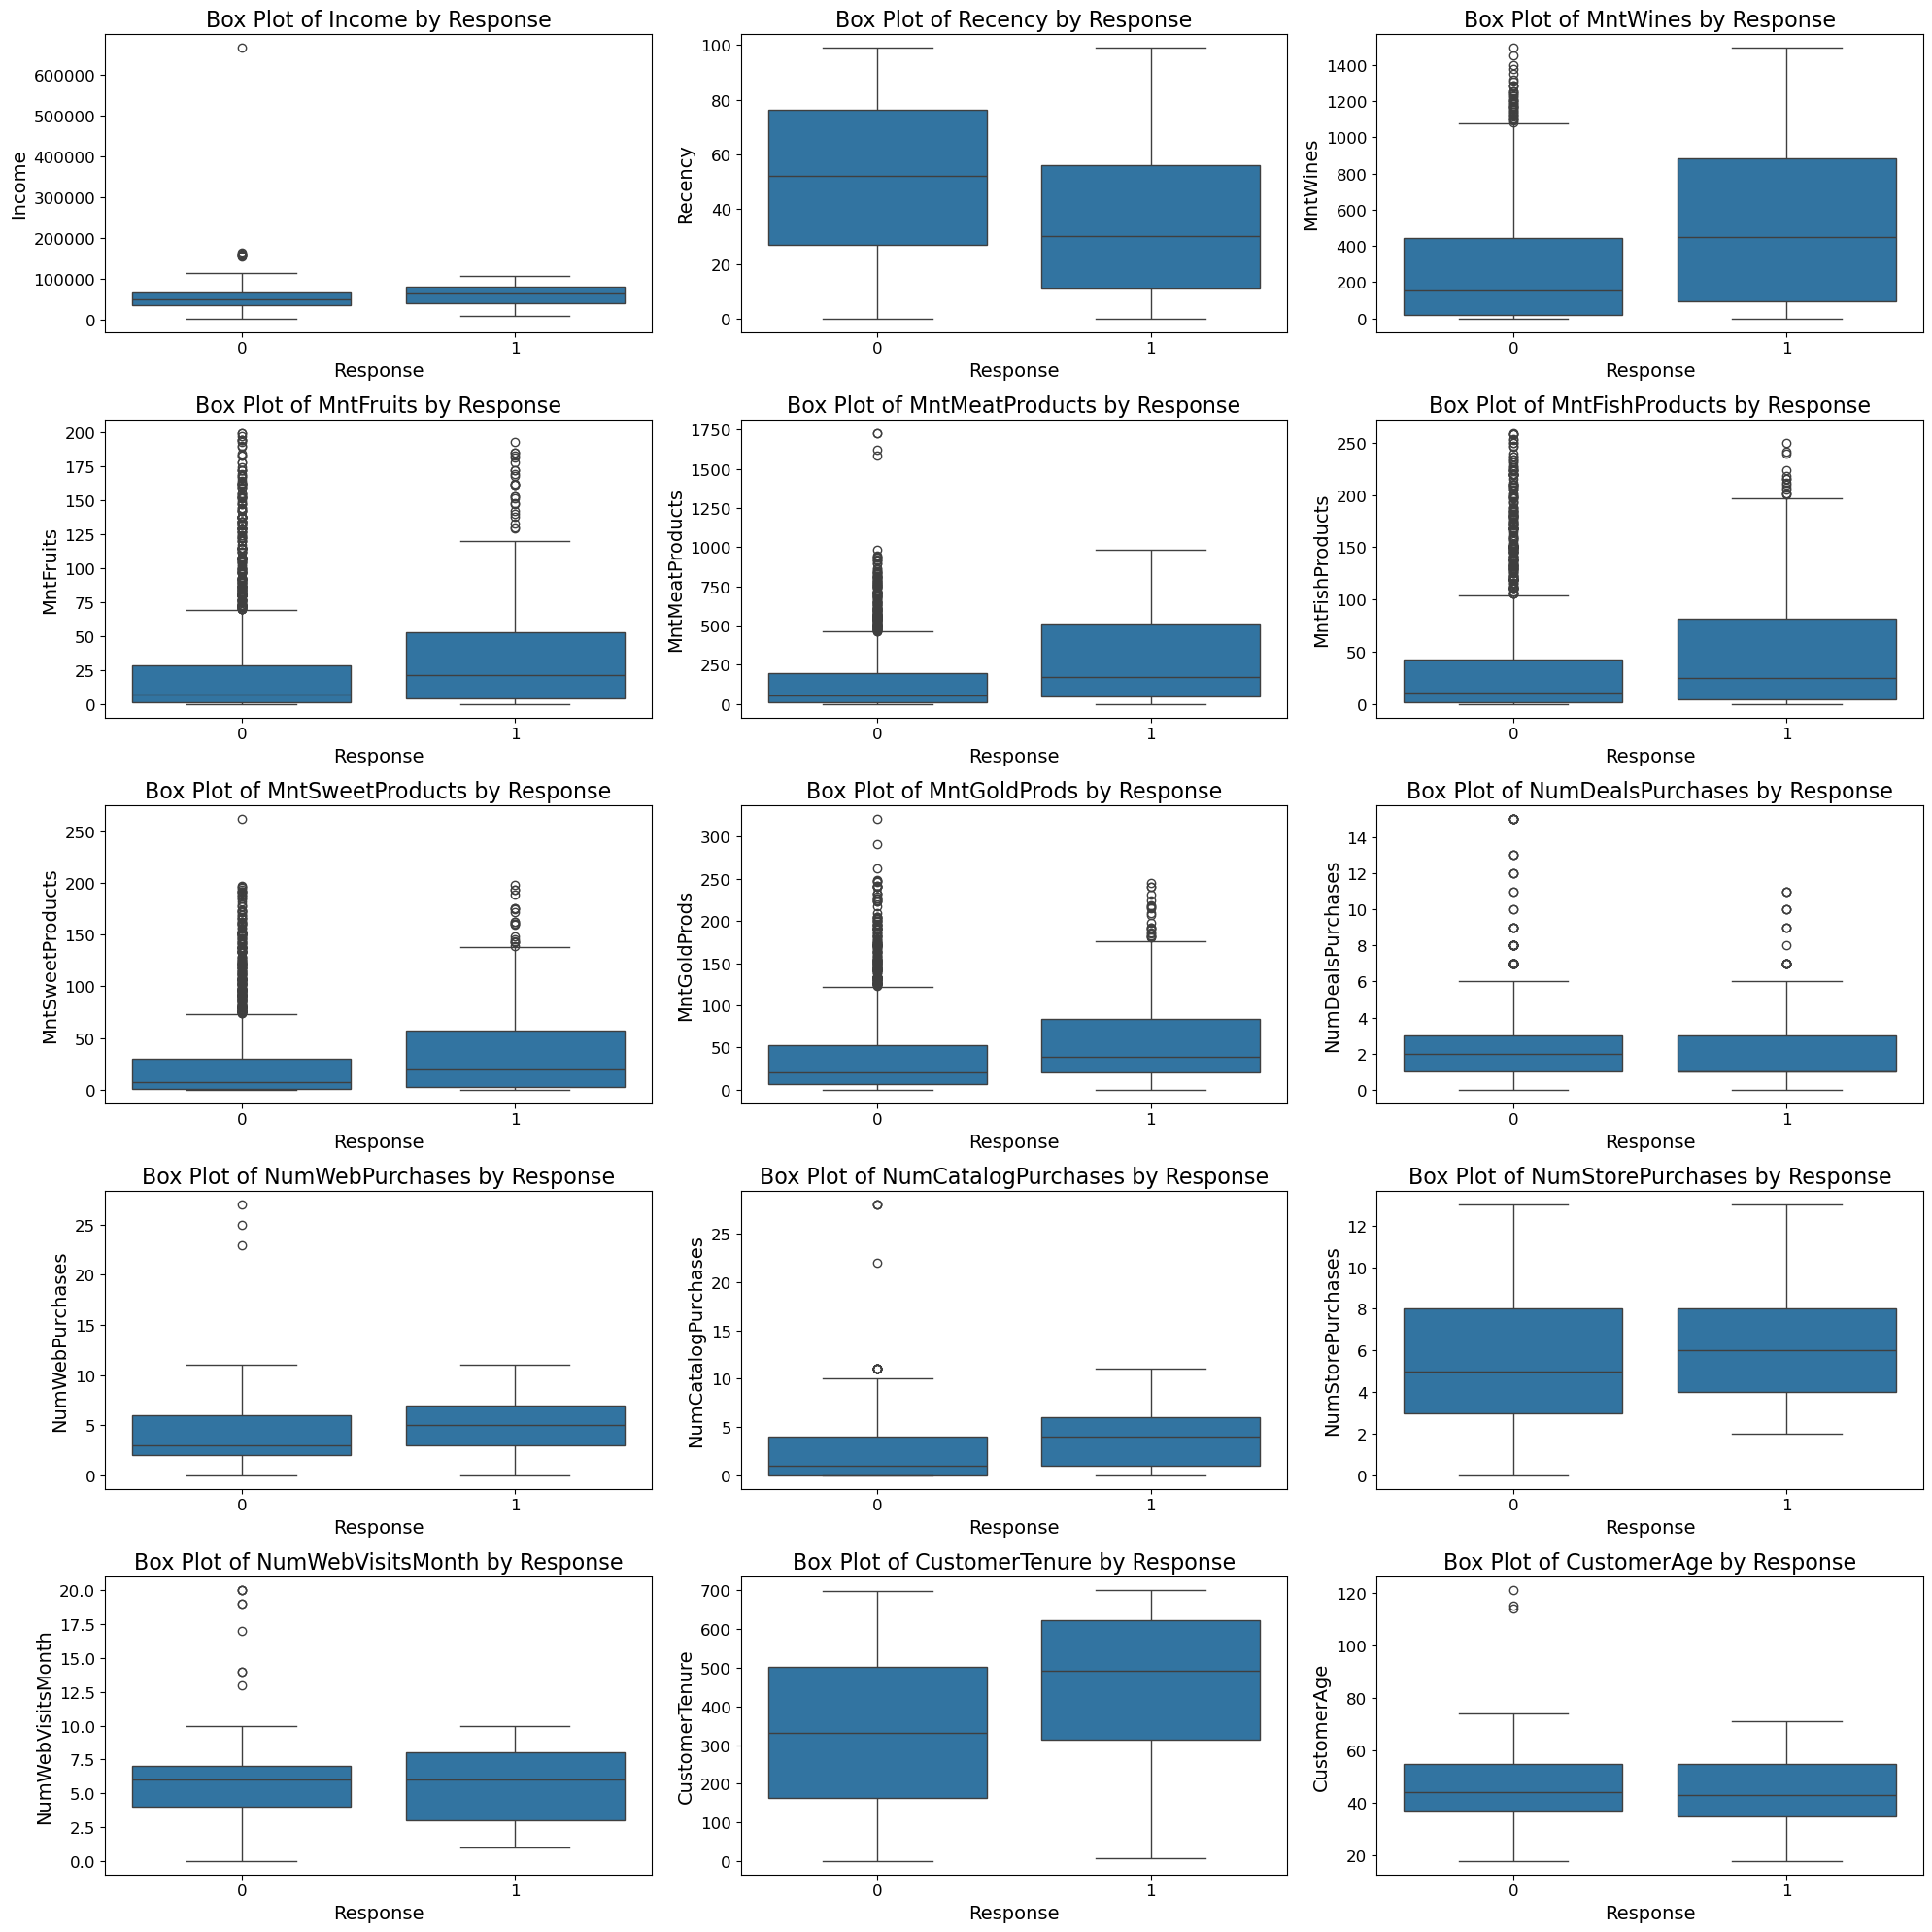

In [9]:
# 4. Box Plots to Show Distribution of Numerical Features by "Response"
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x='Response', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Response', fontsize=16)
    plt.xlabel('Response', fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

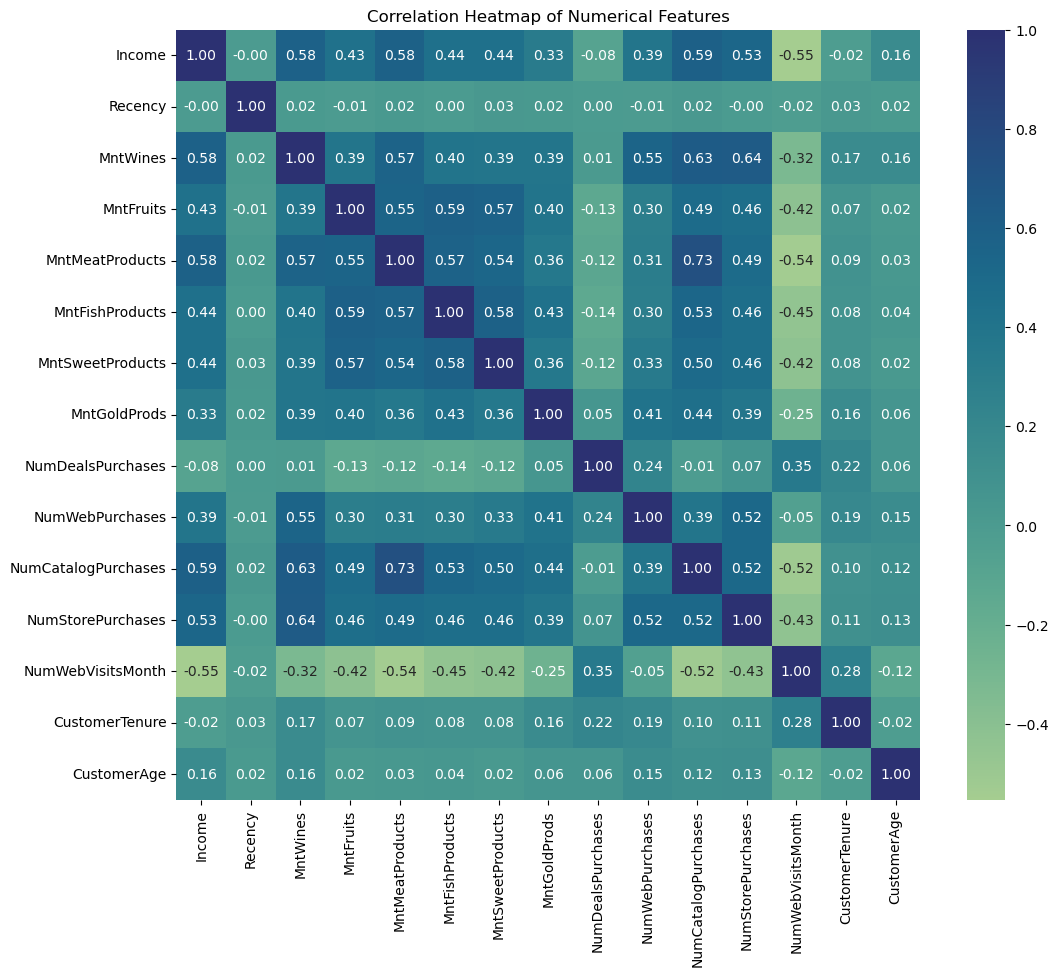

In [10]:
# 5. Correlation Heatmap of Numerical Features
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

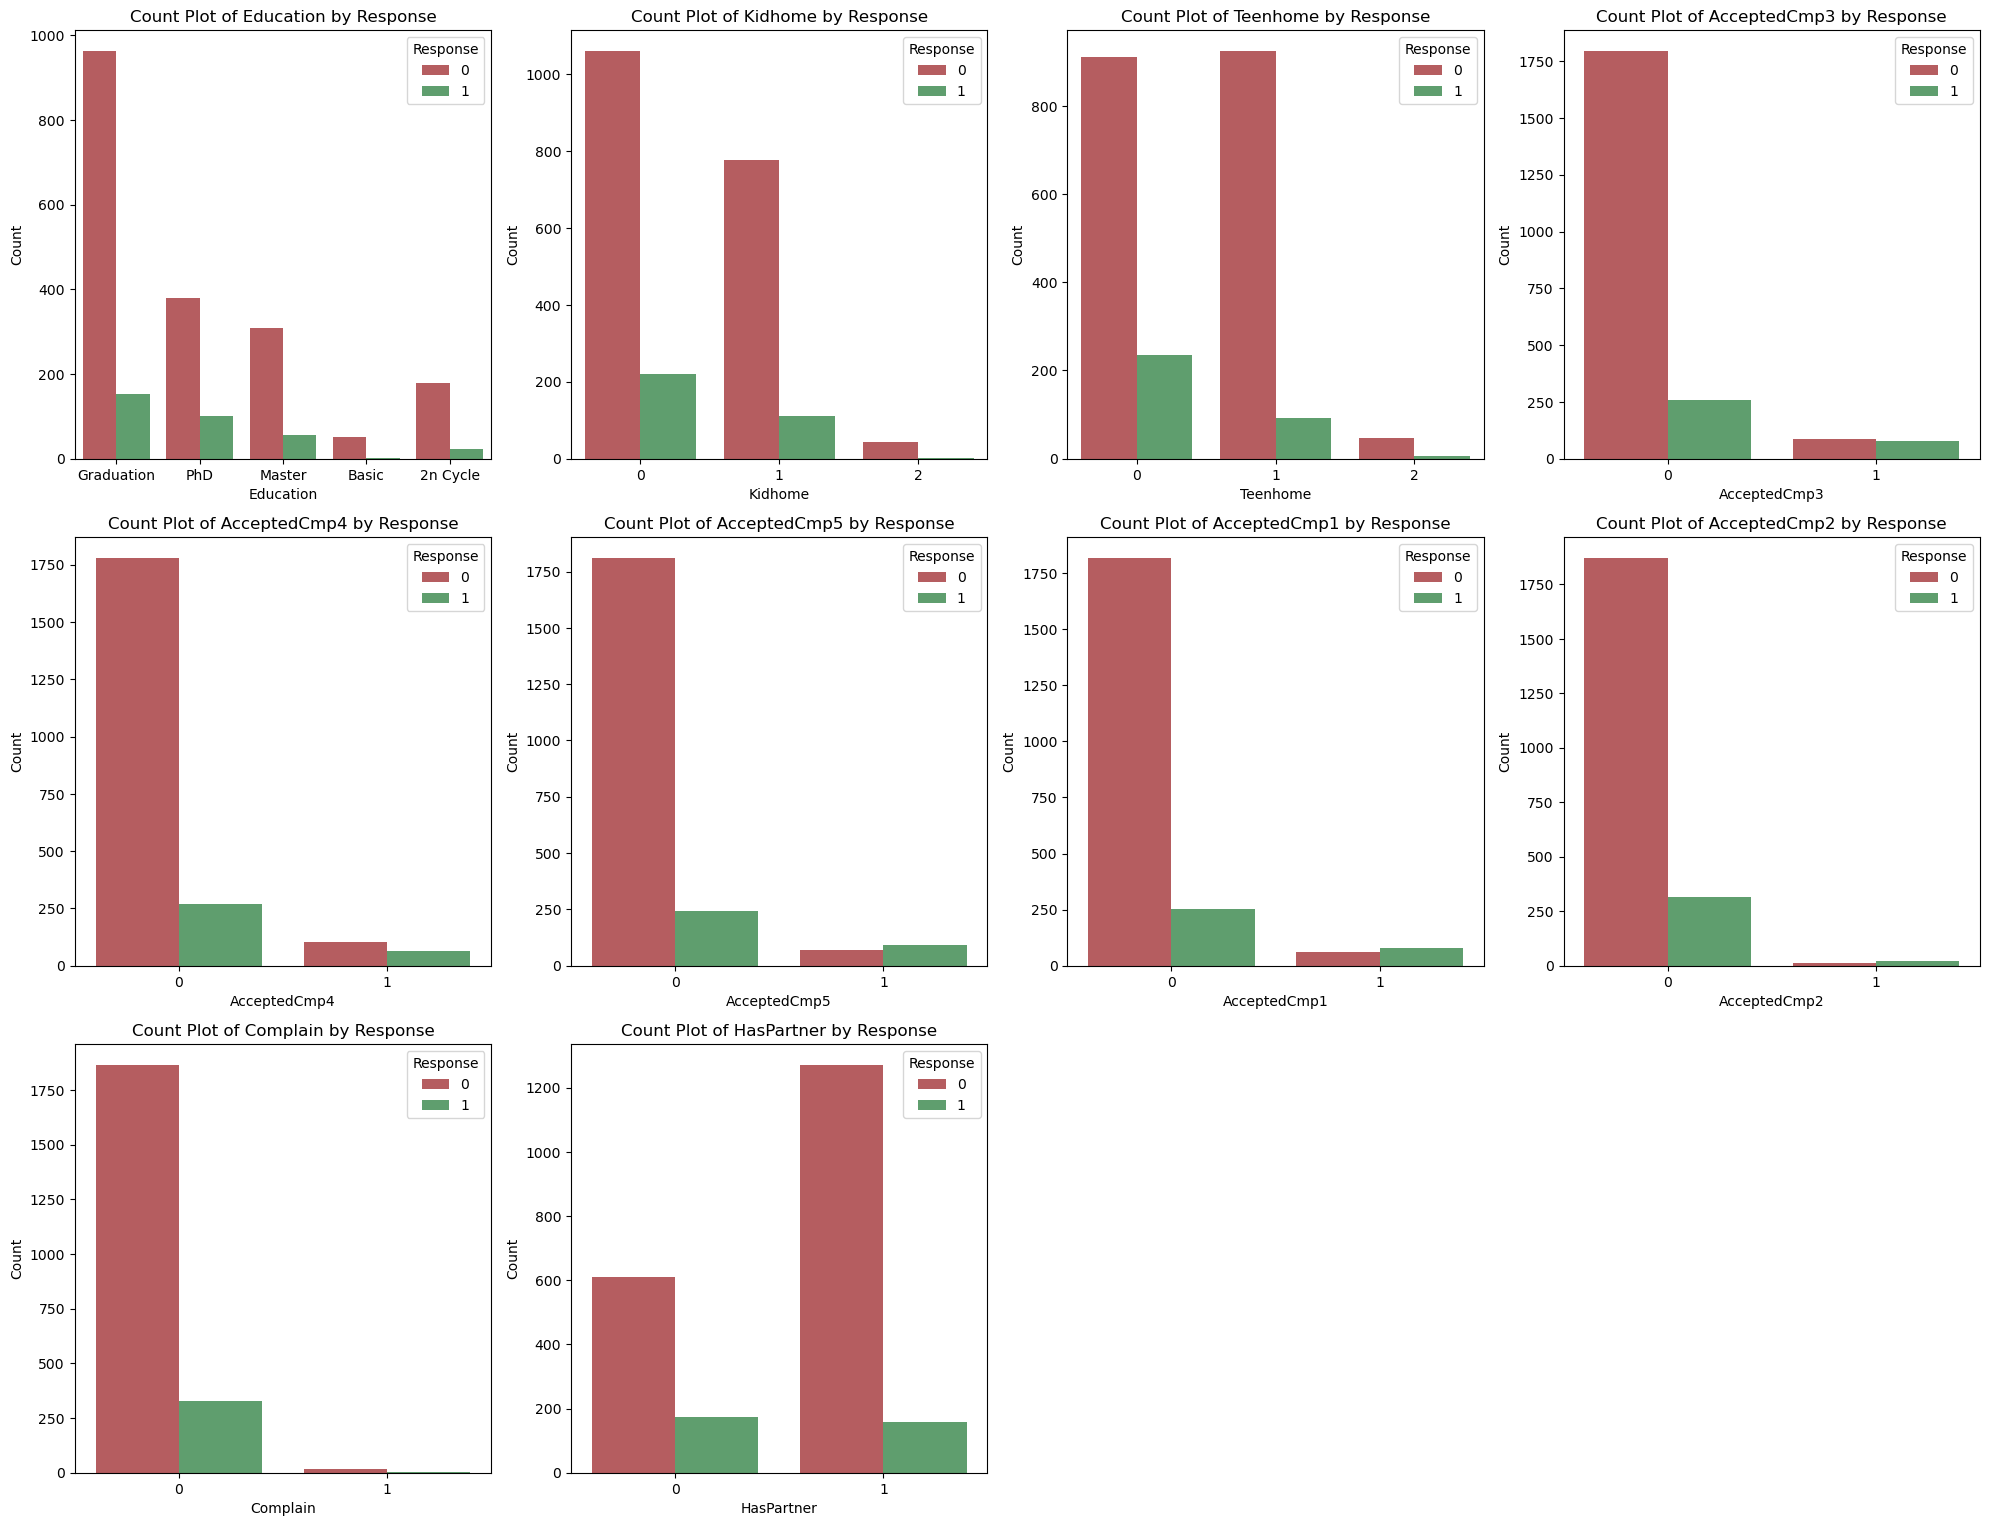

In [11]:
# 7. Count Plots for Categorical Features by "Response"
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=feature, data=data, hue='Response', palette=['#c44e52', '#55a868'])
    plt.title(f'Count Plot of {feature} by Response')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

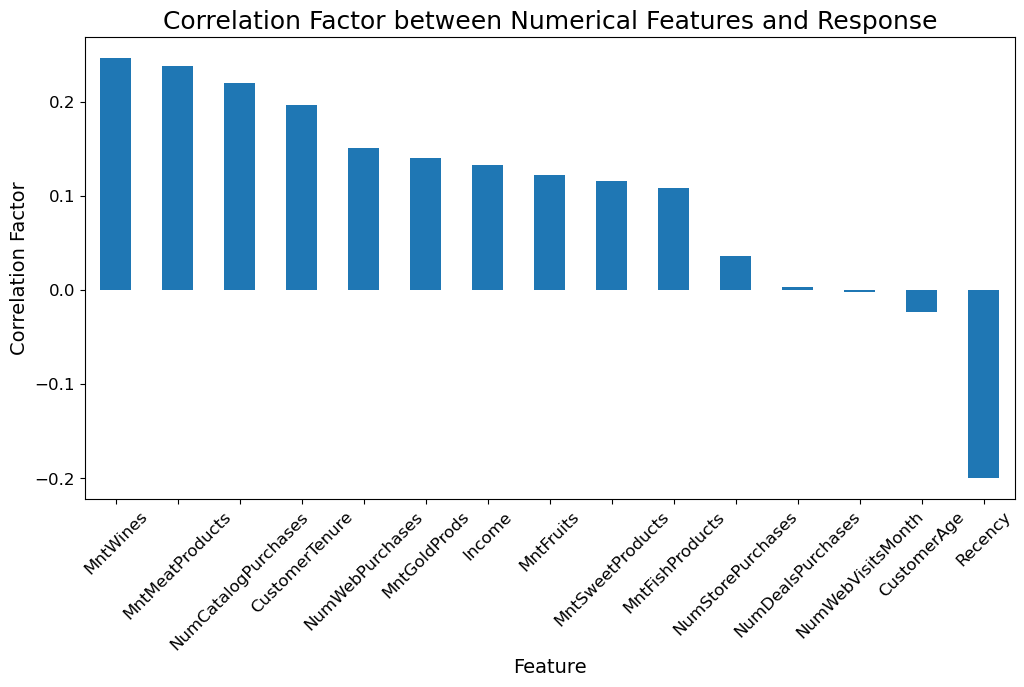

In [12]:
# 8. Plot of correlation factor between numerical features and response
correlation_matrix = data[numerical_features + ['Response']].corr()
correlation_with_response = correlation_matrix['Response'].sort_values(ascending=False)
correlation_with_response = correlation_with_response.drop('Response')
correlation_with_response.plot(kind='bar', figsize=(12, 6))
plt.title('Correlation Factor between Numerical Features and Response', fontsize=18)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Correlation Factor', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()